In [1]:
# Market Basket Analysis

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing dataset
train=pd.read_csv('Mall_Customers.csv')

In [4]:
train.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
train.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
train=train.drop('CustomerID',axis=1)
train.rename(columns={'Annual Income (k$)': 'AnnualIncome',
                      'Spending Score (1-100)':'SpendingScore'},inplace=True)

In [7]:
train.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
# Shape of the dataset
train.shape

(200, 4)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender           200 non-null object
Age              200 non-null int64
AnnualIncome     200 non-null int64
SpendingScore    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [10]:
# Checking data types
train.dtypes

Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

In [11]:
# Checking null values
train.isnull().sum()

Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

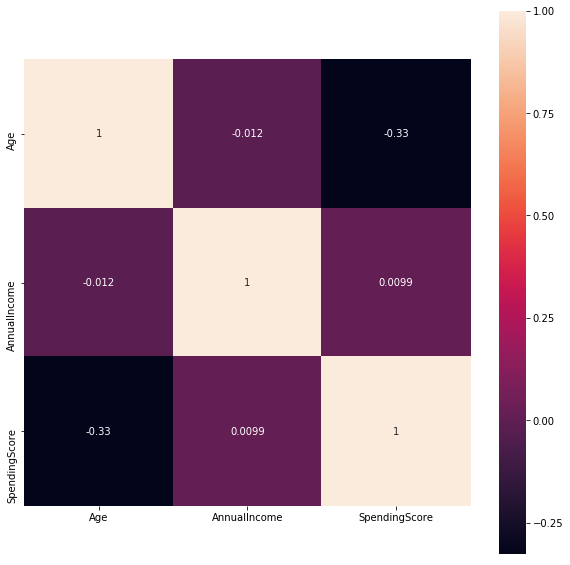

In [17]:
# Correlation Matrix analysis
corr=train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,square=True)

In [13]:
# Exploratory Data Analysis( EDA )

In [14]:
# Customer Age Analysis
train.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

Text(0.5,1,'Age distributions of customers')

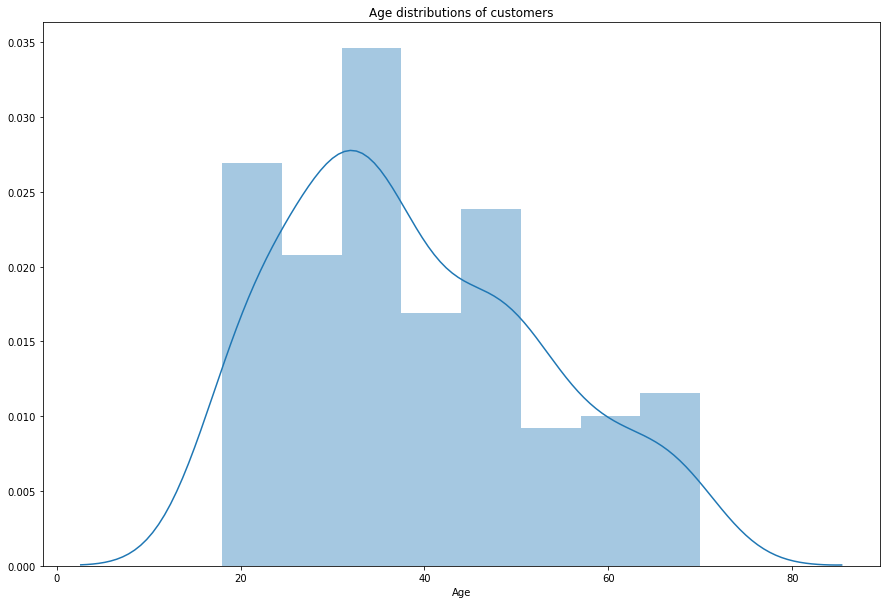

In [16]:
# Visualisation 1
plt.figure(figsize=(15,10))
sns.distplot(train.Age)
plt.title('Age distributions of customers')

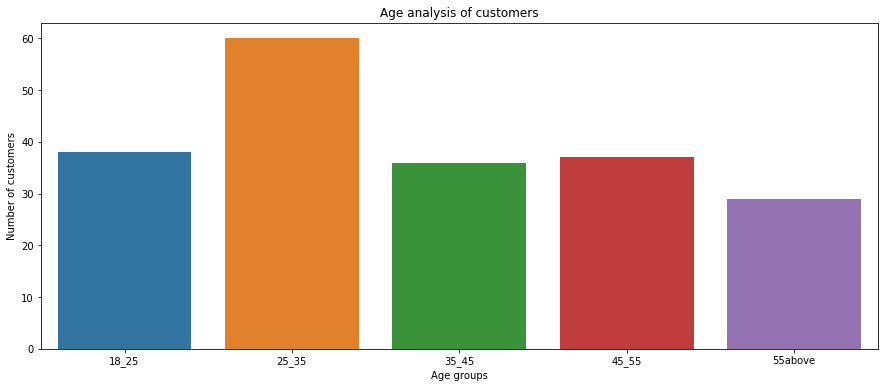

In [21]:
# Visualisation 2
age18_25= train[train.Age<=25].Age
age25_35= train[(train.Age>25) & (train.Age<=35)].Age
age35_45= train[(train.Age>35) & (train.Age<=45)].Age
age45_55= train[(train.Age>45) & (train.Age<=55)].Age
age55above= train[train.Age>55].Age
x=['18_25','25_35','35_45','45_55','55above']
y=[len(age18_25.values),len(age25_35.values),len(age35_45.values),
   len(age45_55.values),len(age55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y)
plt.xlabel('Age groups')
plt.ylabel('Number of customers')
plt.title('Age analysis of customers')
plt.show()

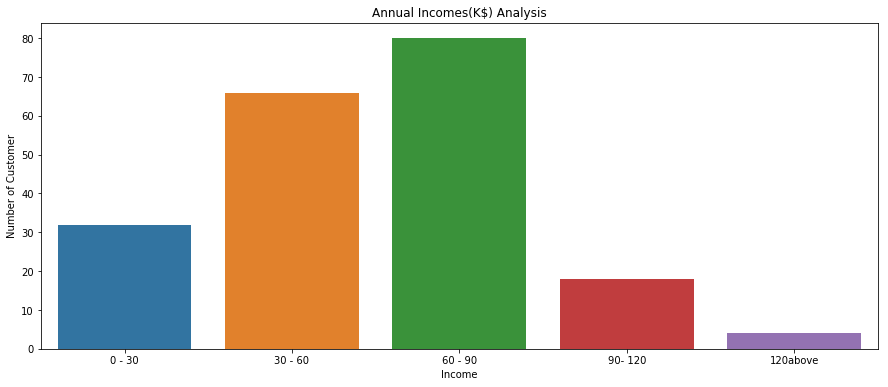

In [20]:
# Income analysis
i0_30 = train[train.AnnualIncome<=30].AnnualIncome
i31_60 = train[(train.AnnualIncome>30) & (train.AnnualIncome<=60)].AnnualIncome
i61_90 = train[(train.AnnualIncome>60) & (train.AnnualIncome<=90)].AnnualIncome
i91_120 = train[(train.AnnualIncome>90) & (train.AnnualIncome<=120)].AnnualIncome
i121above = train[train.AnnualIncome>120].AnnualIncome
ix = ["0 - 30", "30 - 60", "60 - 90", "90- 120", "120above"]
iy = [len(i0_30.values), len(i31_60.values), len(i61_90.values), 
      len(i91_120.values), len(i121above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ix, y=iy)
plt.title("Annual Incomes(K$) Analysis")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

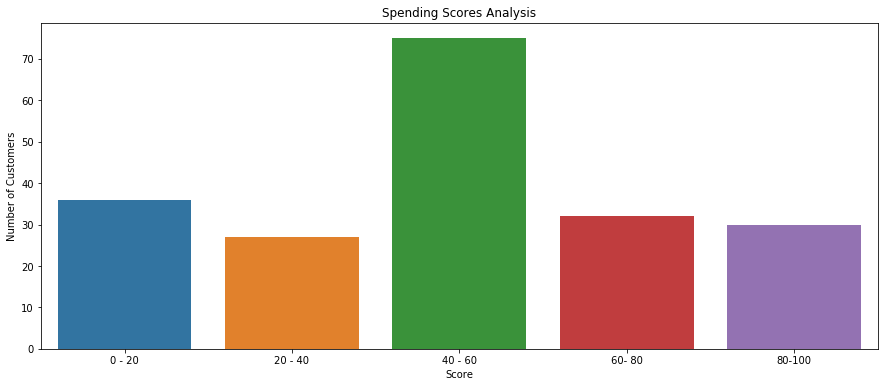

In [22]:
# Spending Score Analysis
s0_20 = train[train.SpendingScore<=20].SpendingScore
s20_40 = train[(train.SpendingScore>20) & (train.SpendingScore<=40)].SpendingScore
s40_60 = train[(train.SpendingScore>40) & (train.SpendingScore<=60)].SpendingScore
s60_80 = train[(train.SpendingScore>60) & (train.SpendingScore<=80)].SpendingScore
s80_100 = train[train.SpendingScore>80].SpendingScore
sx = ["0 - 20", "20 - 40", "40 - 60", "60- 80", "80-100"]
sy = [len(s0_20.values), len(s20_40.values), len(s40_60.values), 
      len(s60_80.values), len(s80_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=sx, y=sy)
plt.title("Spending Scores Analysis")
plt.xlabel("Score")
plt.ylabel("Number of Customers")
plt.show()

In [23]:
## Gender Analysis
train.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [24]:
train.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

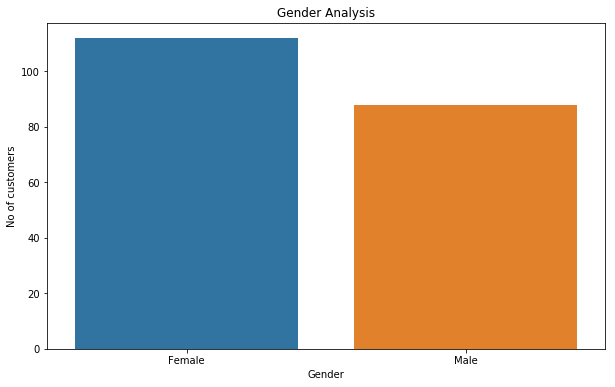

In [25]:
# Visualisation 1
plt.figure(figsize=(10,6))
sns.barplot(x=train.Gender.value_counts().index,
            y=train.Gender.value_counts().values)
plt.xlabel('Gender')
plt.ylabel('No of customers')
plt.title('Gender Analysis')
plt.show()

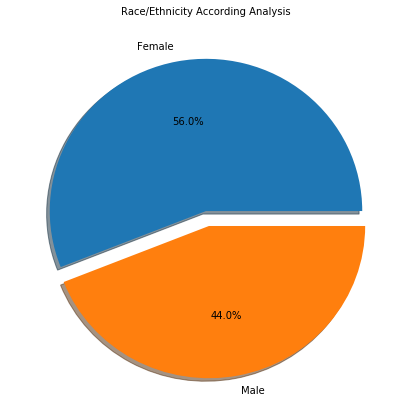

In [27]:
# Visualisation 2
labels=train.Gender.value_counts().index
explode=[0,0.1]
values=train.Gender.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,shadow=True,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()

In [29]:
# Gender vs Income analysis
train[train.Gender=='Male'].AnnualIncome.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: AnnualIncome, dtype: float64

In [30]:
# Gender vs Income analysis
train[train.Gender=='Female'].AnnualIncome.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: AnnualIncome, dtype: float64

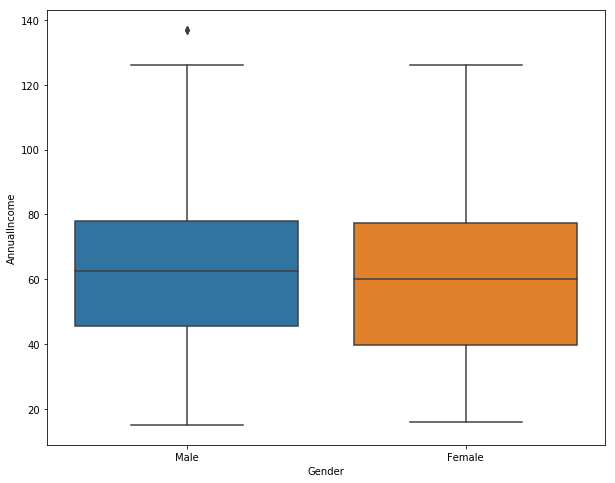

In [32]:
# visualisation 1
plt.figure(figsize=(10,8))
sns.boxplot(x='Gender',y='AnnualIncome',data=train)

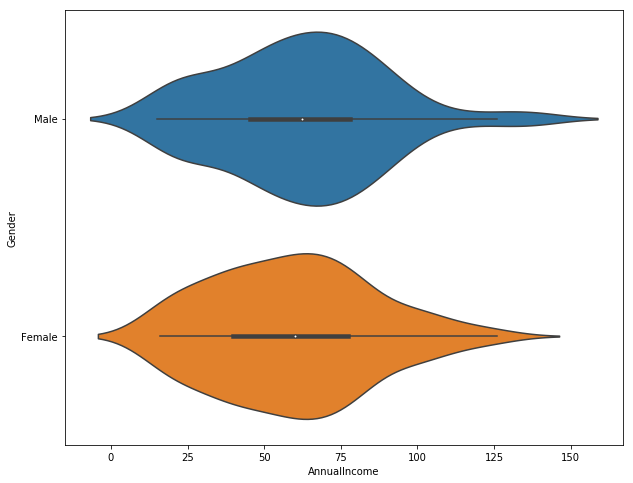

In [33]:
# visualisation 2
plt.figure(figsize=(10,8))
sns.violinplot(y='Gender',x='AnnualIncome',data=train)

In [34]:
# Gender vs Score Analysis
train[train.Gender=='Male'].SpendingScore.describe()

count    88.000000
mean     48.511364
std      27.896770
min       1.000000
25%      24.500000
50%      50.000000
75%      70.000000
max      97.000000
Name: SpendingScore, dtype: float64

In [35]:
train[train.Gender=='Female'].SpendingScore.describe()

count    112.000000
mean      51.526786
std       24.114950
min        5.000000
25%       35.000000
50%       50.000000
75%       73.000000
max       99.000000
Name: SpendingScore, dtype: float64

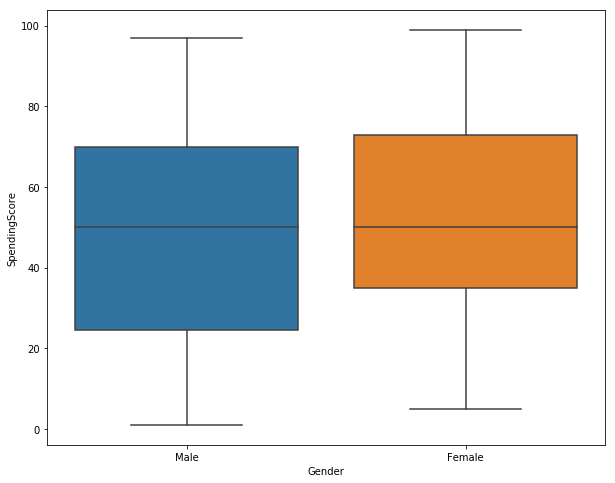

In [36]:
# visualisation 1
plt.figure(figsize=(10,8))
sns.boxplot(x='Gender',y='SpendingScore',data=train)

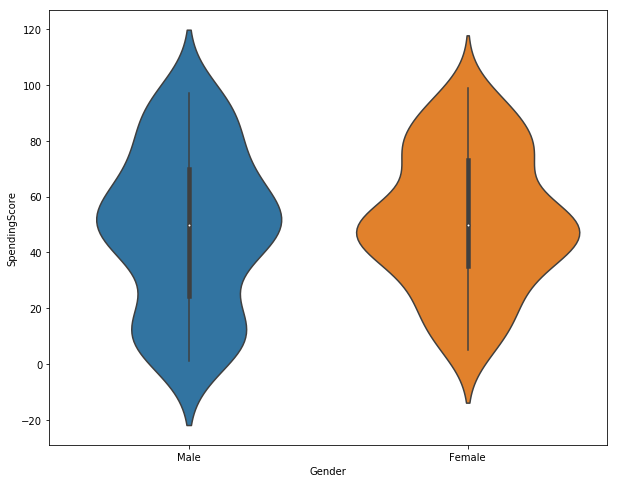

In [37]:
# visualisation 2
plt.figure(figsize=(10,8))
sns.violinplot(x='Gender',y='SpendingScore',data=train)

In [38]:
# Gender vs Age analysis
train[train.Gender=='Male'].Age.describe()

count    88.000000
mean     39.806818
std      15.514812
min      18.000000
25%      27.750000
50%      37.000000
75%      50.500000
max      70.000000
Name: Age, dtype: float64

In [39]:
train[train.Gender=='Female'].Age.describe()

count    112.000000
mean      38.098214
std       12.644095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.500000
max       68.000000
Name: Age, dtype: float64

<Figure size 720x576 with 0 Axes>

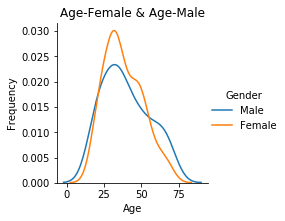

In [43]:
# visualisation 1
plt.figure(figsize=(10,8))
sns.FacetGrid(data=train,hue='Gender') \
    .map(sns.kdeplot,'Age') \
    .add_legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age-Female & Age-Male')
plt.show()

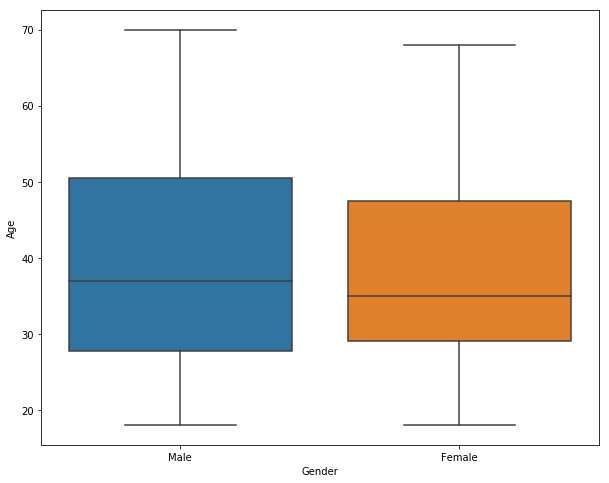

In [44]:
# visualisation 2
plt.figure(figsize=(10,8))
sns.boxplot(x='Gender',y='Age',data=train)

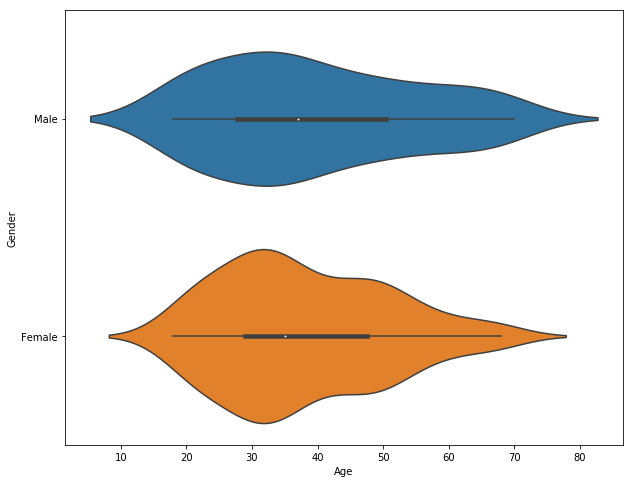

In [45]:
# visualisation 3
plt.figure(figsize=(10,8))
sns.violinplot(y='Gender',x='Age',data=train)

Text(0.5,1,'Age vs Spending Score')

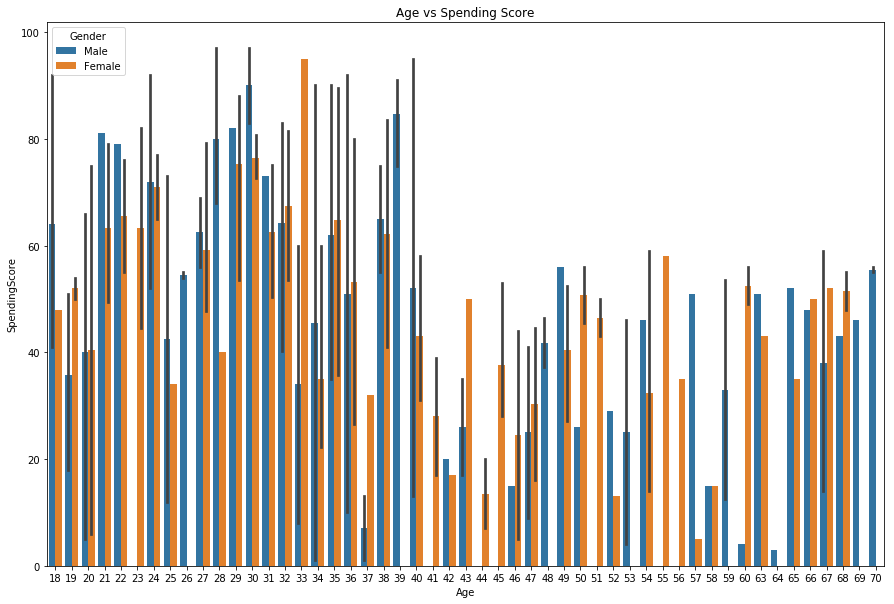

In [72]:
# barplot
plt.figure(figsize=(15,10))
sns.barplot(x='Age',y='SpendingScore',hue='Gender',data=train)
plt.title('Age vs Spending Score')

Text(0.5,1,'Annual Income vs Spending Score')

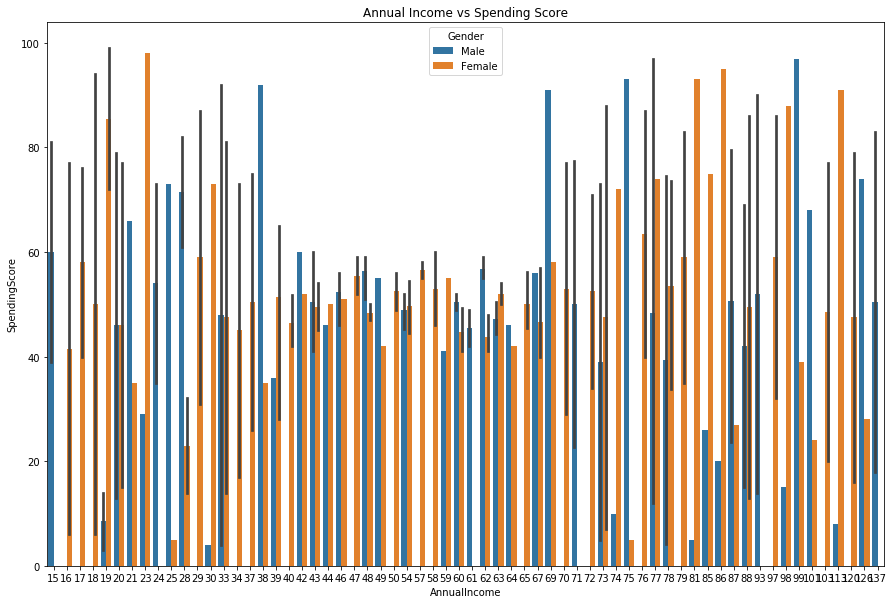

In [73]:
plt.figure(figsize=(15,10))
sns.barplot(x='AnnualIncome',y='SpendingScore',hue='Gender',data=train)
plt.title('Annual Income vs Spending Score')

Text(0.5,1,'Age vs Annual Income')

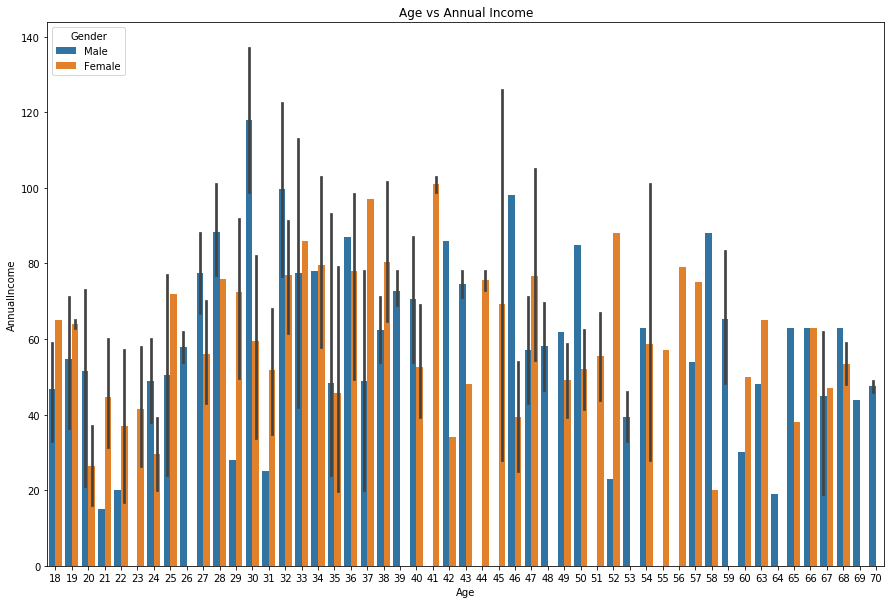

In [74]:
plt.figure(figsize=(15,10))
sns.barplot(x='Age',y='AnnualIncome',hue='Gender',data=train)
plt.title('Age vs Annual Income')

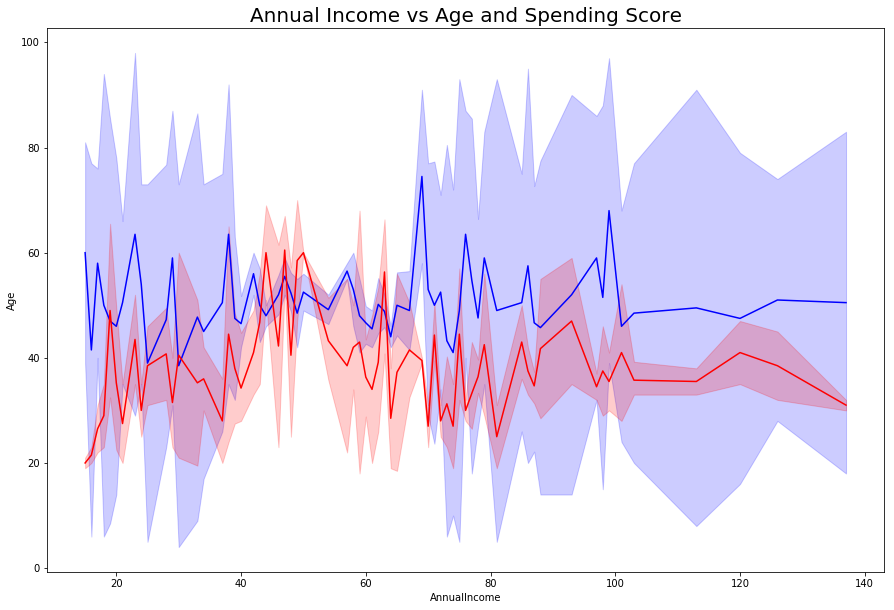

In [51]:
# line plot
plt.figure(figsize=(15,10))
sns.lineplot(x=train.AnnualIncome,y=train.SpendingScore,color='blue')
sns.lineplot(x=train.AnnualIncome,y=train.Age,color='red')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

<Figure size 1080x720 with 0 Axes>

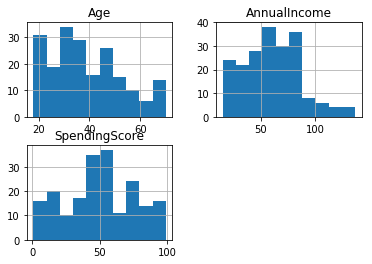

In [53]:
# Histogram
train.hist()
plt.title('All data histigram')
plt.show()

<Figure size 1080x720 with 0 Axes>

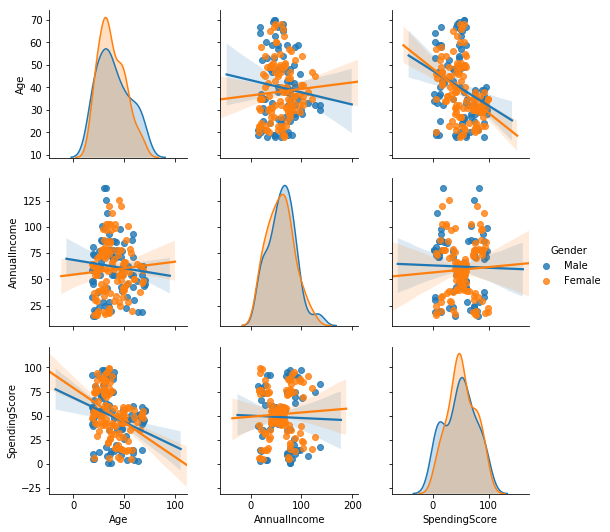

In [55]:
# Pair plot
plt.figure(figsize=(15,10))
sns.pairplot(data=train,hue='Gender',kind='reg')
plt.show()

In [56]:
# Dependent variable X for model fitting
X = train.drop('Gender',axis=1)

In [57]:
X.head()

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [58]:
# Model fitting

In [59]:
# K-means Clustering

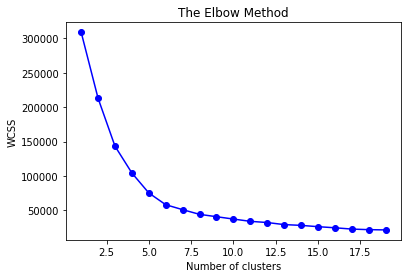

In [60]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss,'bo-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
# Fitting K-Means to the dataset with K=5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

In [62]:
print(y_kmeans)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [63]:
print(centroids)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [40.32432432 87.43243243 18.18918919]
 [43.12658228 54.82278481 49.83544304]
 [25.27272727 25.72727273 79.36363636]]


In [64]:
# Hierarchical Clustering

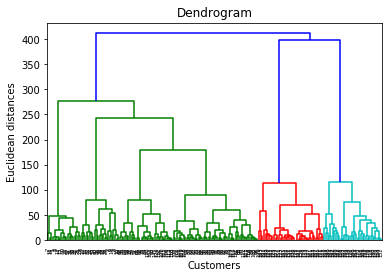

In [67]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [68]:
# Fitting Hierarchical Clustering to the dataset with 3 clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',
                             linkage = 'ward')
y_hc1 = hc.fit_predict(X)

In [69]:
print(y_hc1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [70]:
# Fitting Hierarchical Clustering to the dataset with 5 clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean',
                             linkage = 'ward')
y_hc2 = hc.fit_predict(X)

In [71]:
print(y_hc2)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
